Shibu Mohapatra

Artificial Intelligence

**Write a program to implement Delta rule.**

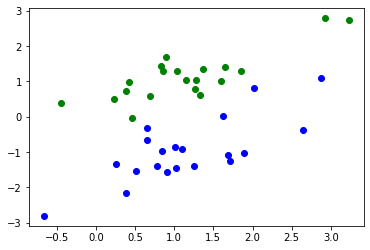

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# the number of data points per class
num_points = 20

# data points for class -1
data1 = np.random.multivariate_normal([1,1], [[0.8, 0.6],[0.6, 0.7]], num_points)
# data points for class 1
data2 = np.random.multivariate_normal([1,-1], [[0.8, 0.6],[0.6, 0.7]], num_points)

# plot both arrays
# note that arrays are indexed [row, col]
plt.scatter(data1[:,0], data1[:,1], c='green')
plt.scatter(data2[:,0], data2[:,1], c='blue')
plt.show()

In [2]:
# we create one dataset with the class attribute
# 1) add one column with the class label
# create the class labels for both classes
c0 = - np.ones([num_points, 1])
c1 = np.ones([num_points, 1])
# append the class labels to both datasets
data1 = np.append(data1, c0, axis=1)
data2 = np.append(data2, c1, axis=1)
# 2) combine the two classes in one data array
data = np.append(data1, data2, axis=0)

# we shuffle the data by rows because we want positive and negative examples to be interleaved; the algorithm below will update the weights after processing one data example
np.random.shuffle(data)

# print the first 5 rows to see what the data looks like
print(data[:5])

[[ 1.25417684 -1.39316656  1.        ]
 [ 1.15265869  1.04247086 -1.        ]
 [ 0.90804521 -1.55141543  1.        ]
 [ 1.01883423 -1.4530016   1.        ]
 [ 0.39017284 -2.14597111  1.        ]]


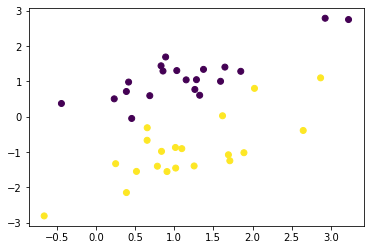

In [3]:
plt.scatter(data[:,0], data[:,1], c=data[:,2] )
plt.show()

In [4]:
# A coroutine that receives data and prints it
def printer():
    i = 0
    line=""
    while True:
        vec = yield
        if vec.size == 1:
            if i > 0:
                # print anything that is left in the buffer
                print(line)
                i = 0
                line = ""
        else:
            i = i + 1
            line = line + " " + str(np.round(vec,4))
            if i % 4 == 0:
                print(line)
                line = ""
                i = 0

printer_handler = printer()
# start the printer
printer_handler.send(None)

# we need 3 parameters: one for x, one for y, and one for the bias term
w = np.random.normal(0, 0.5, 3)
# learning rate
epsilon = 0.05
delta = 100
iteration = 0
precision=0.01

while delta > precision and iteration < 10:
    iteration = iteration + 1
    # to be consistent with the textbook, we will process one data point at a time
    for s in data:
        # compute the linear activation (predicted output)
        s_with_bias = np.copy(s)
        s_with_bias[2] = 1 # the last element is used as the bias activation
        o_k =  w.dot(s_with_bias) # see Eq. 5.6 in O'reilly & Munakata (2000)
        t_k = s[2]
        # the delta rule equation in the vector form
        delta_w = epsilon * (t_k - o_k) * s_with_bias # see Eq. 5.3
        w = w + delta_w
        # if the max change is tiny, we will stop learning in the while loop
        delta=np.max(np.absolute(delta_w))
        # print the current weights
        printer_handler.send(w)

# print the remaining values if there are any
printer_handler.send(np.zeros([1,1]))

 [0.4921 0.9596 0.7947] [0.2983 0.7844 0.6266] [0.3582 0.682  0.6926] [0.4058 0.6142 0.7392]
 [0.4335 0.4618 0.8103] [0.3824 0.342  0.6881] [0.2286 0.2481 0.5663] [0.1863 0.0683 0.6303]
 [ 0.0188 -0.0743  0.5287] [-0.0444 -0.1943  0.4577] [-0.0602 -0.2284  0.3902] [-0.0025 -0.2274  0.4259]
 [ 0.0257 -0.2454  0.4426] [-0.0196 -0.2845  0.3769] [-0.0101 -0.3013  0.3889] [-0.0954 -0.3549  0.3353]
 [ 0.0952 -0.2819  0.4017] [ 0.0618 -0.2783  0.3288] [ 0.0672 -0.2945  0.3392] [ 0.0844 -0.3026  0.3655]
 [ 0.0396 -0.3703  0.3131] [-0.0186 -0.4256  0.2932] [-0.0008 -0.4386  0.3037] [-0.0201 -0.474   0.2541]
 [-0.0021 -0.4893  0.2718] [ 0.0137 -0.5024  0.2862] [ 0.0775 -0.5118  0.3103] [ 0.0774 -0.5111  0.3098]
 [ 0.1728 -0.4733  0.357 ] [ 0.0868 -0.5127  0.292 ] [ 0.037  -0.5612  0.2558] [-0.0089 -0.5987  0.22  ]
 [-0.0235 -0.6239  0.2025] [-0.002  -0.6423  0.1535] [ 0.0117 -0.6562  0.1745] [-0.0053 -0.6778  0.158 ]
 [-0.031  -0.6956  0.1441] [ 0.109  -0.5763  0.1875] [ 0.1155 -0.584   0.1953] 

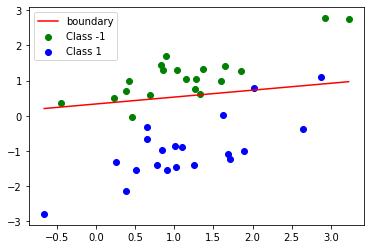

In [5]:
# plot the final line

# construct the line using 100 points
x = np.linspace(np.min(data[:,0]),np.max(data[:,0]),100)
# this equation corresponds to our decision boundary on the xy-plane when the threshold is zero
y = -w[0]/w[1]*x-w[2]/w[1]
ymin = np.min(data[:,1])
ymax = np.max(data[:,1])

# plot the data and the line
plt.ylim(ymin-0.3, ymax+0.3)
# plot two classes separately
plt.scatter(data1[:,0], data1[:,1], c='green', label='Class -1' )
plt.scatter(data2[:,0], data2[:,1], c='blue', label='Class 1' )
plt.plot(x, y, '-r', label='boundary')
plt.legend()
plt.show()

In [6]:
# we need to add bias activations in the last column
data_with_bias = np.copy(data)
data_with_bias[:,2]=1

# predictions are the outputs computed by the linear model
predictions = w.dot(data_with_bias.transpose())

# compute the summed squared error with respect to the linear activation; i.e., we want to see see how well the linear function approximates the values of our class attribute
SSE = np.sum(np.square(predictions-data[:,2]))

# this is the same threshold that we used to derive the red decision boundary above; with this threshold, our classification below will be consistent with the red line above
threshold = 0

# apply threshold to make discrete decisions
predictions[predictions<threshold] = -1
predictions[predictions>=threshold] = 1
# print(predictions)
# print(data[:,2])

# diff will be zero when the classification is correct
diff = predictions - data[:,2]
# indices of data items with incorrect predictions
erroneous = diff.nonzero()[0]
# count the number of incorrect predictions
accuracy = np.size(erroneous)

print("SSE on training data: " + str(SSE) )
print("Number of errors on training data: " + str(accuracy) )

SSE on training data: 15.027952856480772
Number of errors on training data: 3
